In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

**DONE BY SRIJA BASAK**

In [ ]:
df1=pd.read_csv('/content/exercise.csv')

In [ ]:
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [ ]:
df2=pd.read_csv('/content/calories.csv')

In [ ]:
df=pd.merge(df1,df2,on="User_ID")

In [ ]:
df.shape

(15000, 9)

In [ ]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

<Axes: ylabel='Age'>

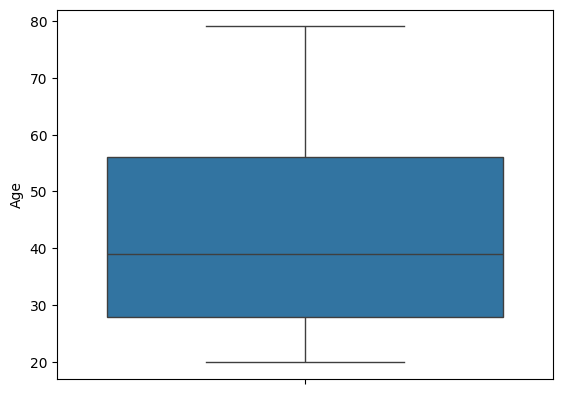

In [ ]:
sns.boxplot(df.Age)

In [ ]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

<Axes: ylabel='Age'>

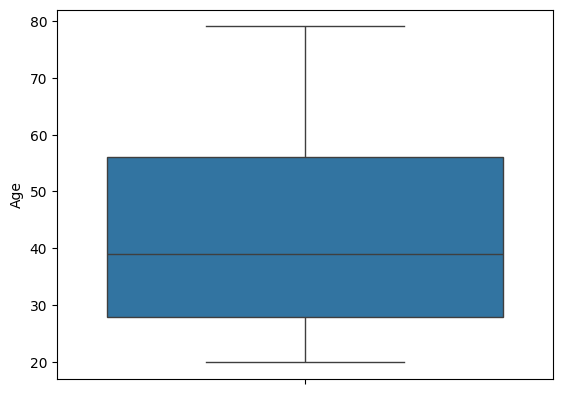

In [ ]:
sns.boxplot(df.Age)


<Axes: ylabel='Height'>

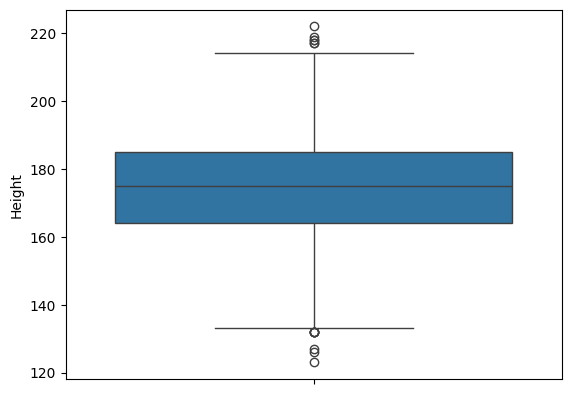

In [ ]:
sns.boxplot(df.Height)


In [ ]:
#Removing the outliers using IQR
q1=df.Height.quantile(0.25)
q3=df.Height.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[df.Height<upper_limit]

<Axes: ylabel='Height'>

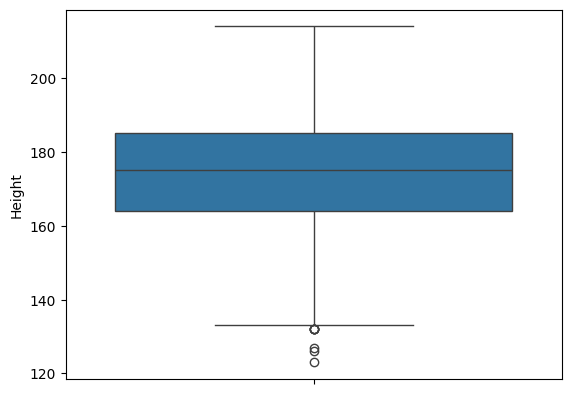

In [ ]:
sns.boxplot(df.Height)

In [ ]:
df=df[df.Height>lower_limit]

<Axes: ylabel='Height'>

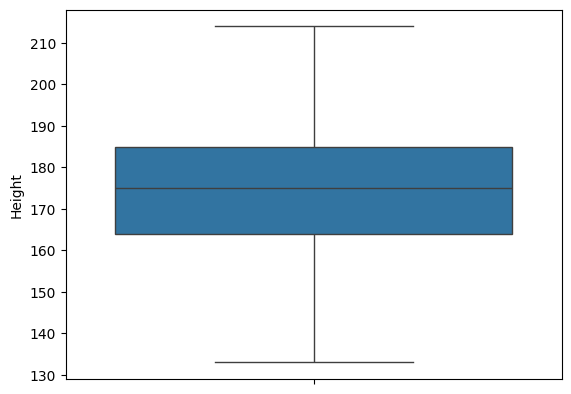

In [ ]:
sns.boxplot(df.Height)

<Axes: ylabel='Weight'>

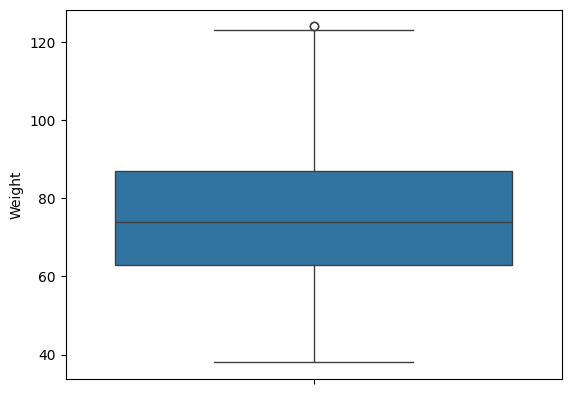

In [ ]:
sns.boxplot(df.Weight)


In [ ]:
#Removing the outliers using IQR
q1=df.Weight.quantile(0.25)
q3=df.Weight.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[df.Weight<upper_limit]

<Axes: ylabel='Weight'>

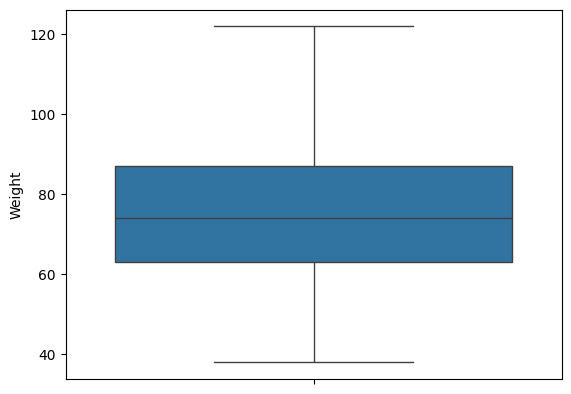

In [ ]:
sns.boxplot(df.Weight)

<Axes: ylabel='Duration'>

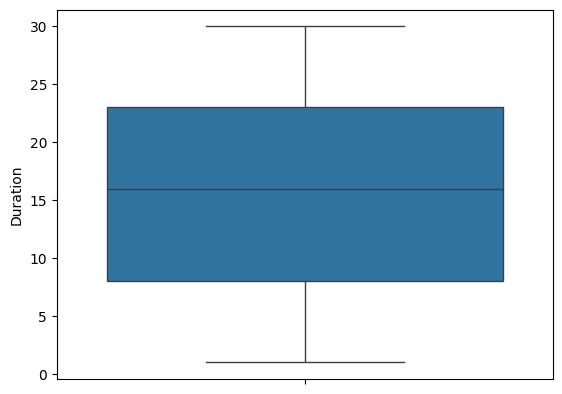

In [ ]:
sns.boxplot(df.Duration)


<Axes: ylabel='Heart_Rate'>

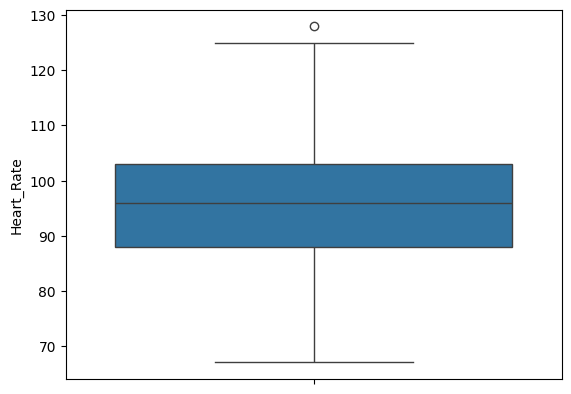

In [ ]:
sns.boxplot(df.Heart_Rate)


In [ ]:
#Removing the outliers using IQR
q1=df.Heart_Rate.quantile(0.25)
q3=df.Heart_Rate.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[df.Heart_Rate<upper_limit]

<Axes: ylabel='Heart_Rate'>

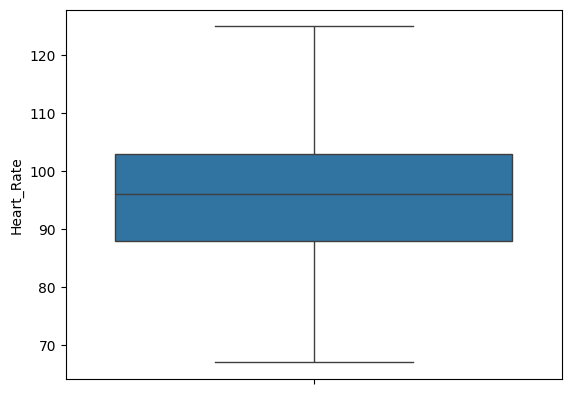

In [ ]:
sns.boxplot(df.Heart_Rate)

<Axes: ylabel='Body_Temp'>

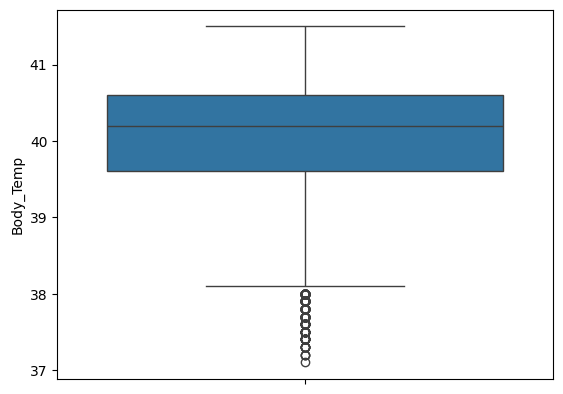

In [ ]:
sns.boxplot(df.Body_Temp)

In [ ]:
#Removing outliers using IQR
q1=df.Body_Temp.quantile(0.25)
q3=df.Body_Temp.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[df.Body_Temp>lower_limit]

<Axes: ylabel='Body_Temp'>

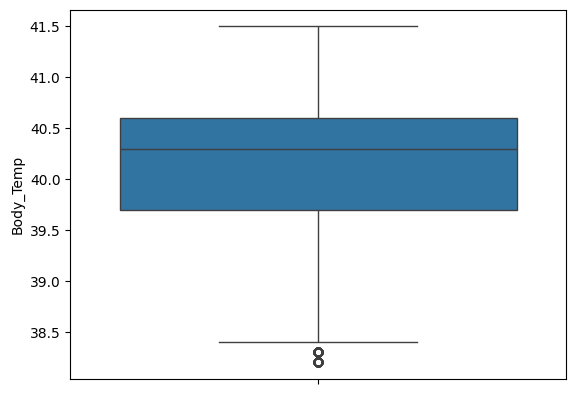

In [ ]:
sns.boxplot(df.Body_Temp)

In [ ]:
#Removing the rest of the outliers with percentile
p99=df.Body_Temp.quantile(0.99)

In [ ]:
p99

41.2

In [ ]:
df=df[df.Body_Temp<=p99]

<Axes: ylabel='Body_Temp'>

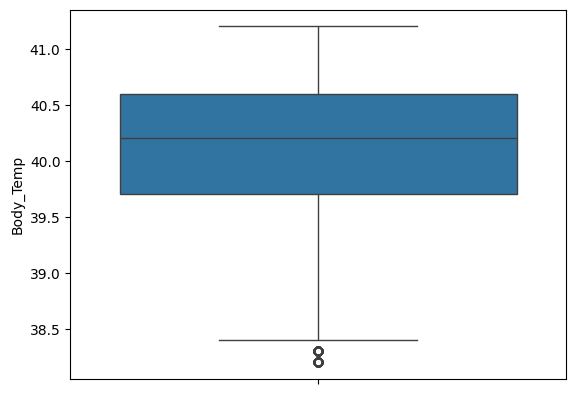

In [ ]:
sns.boxplot(df.Body_Temp)

In [ ]:
#Z-score method with a threshold of 2.5
mean=df.Body_Temp.mean()
std=df.Body_Temp.std()
threshold=2.5
outliers=df[(np.abs(df.Body_Temp-mean)/std)>threshold]
df=df.drop(outliers.index)


<Axes: ylabel='Body_Temp'>

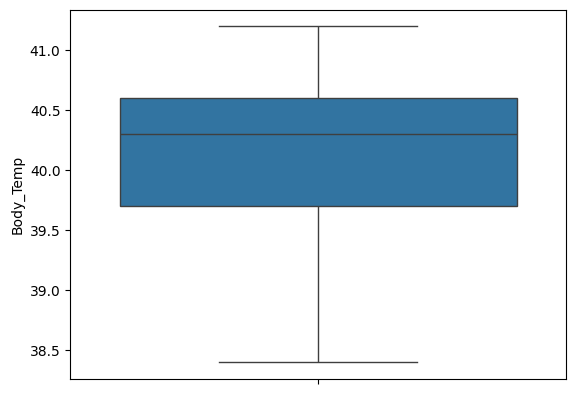

In [ ]:
sns.boxplot(df.Body_Temp)

In [ ]:
df.shape

(14259, 9)

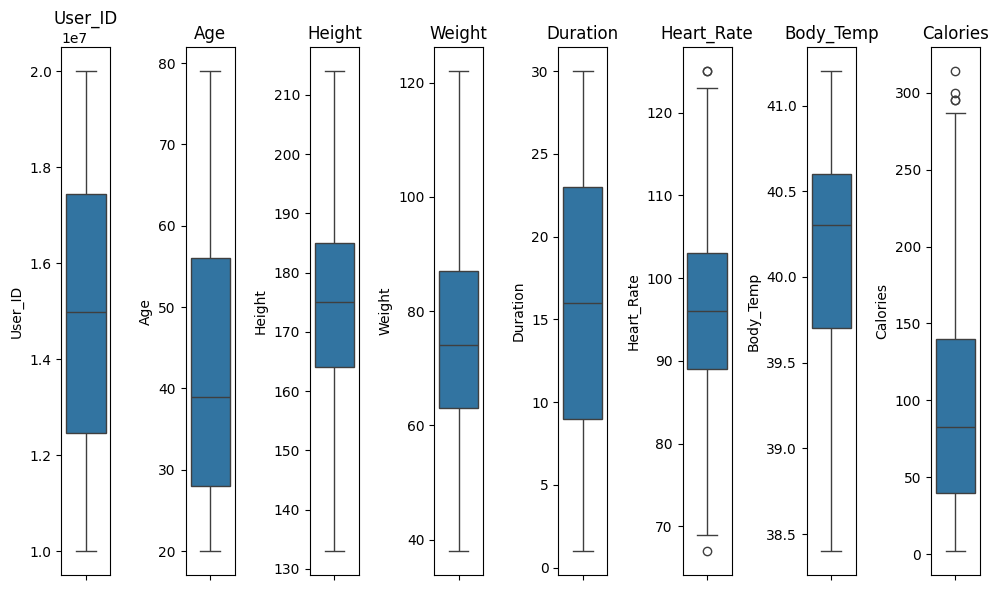

In [ ]:
import matplotlib.pyplot as plt
df_copy=df.copy()
numerical_columns=df_copy.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[column])
    plt.title(f'{column}')
plt.tight_layout()

<Axes: ylabel='Heart_Rate'>

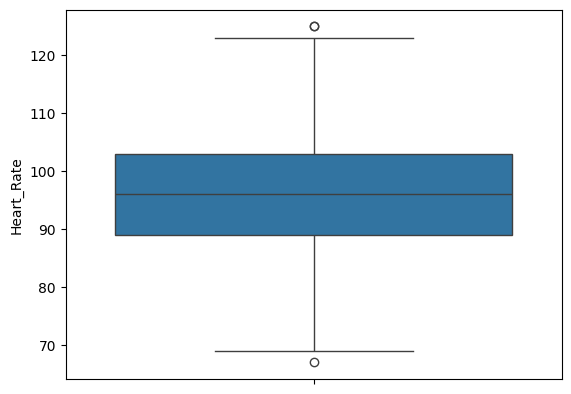

In [ ]:
sns.boxplot(df.Heart_Rate)

In [ ]:
#Z-score method with a threshold of 2.5
mean=df.Heart_Rate.mean()
std=df.Heart_Rate.std()
threshold=2.5
outliers=df[(np.abs(df.Heart_Rate-mean)/std)>threshold]
df=df.drop(outliers.index)

<Axes: ylabel='Heart_Rate'>

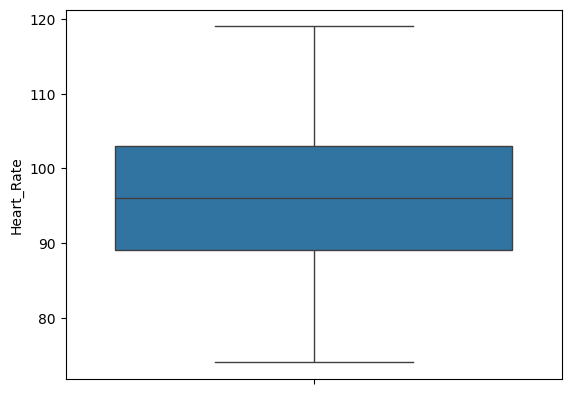

In [ ]:
sns.boxplot(df.Heart_Rate)

<Axes: ylabel='Body_Temp'>

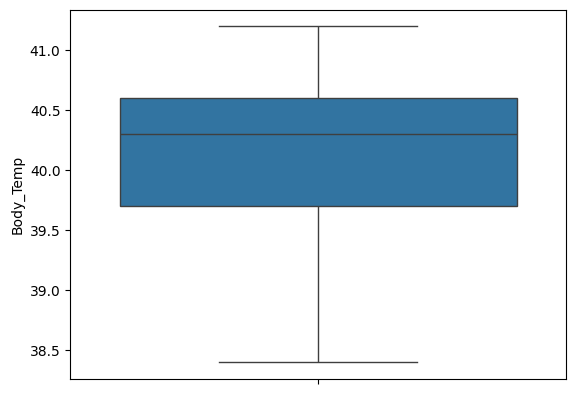

In [ ]:
sns.boxplot(df.Body_Temp)

In [ ]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


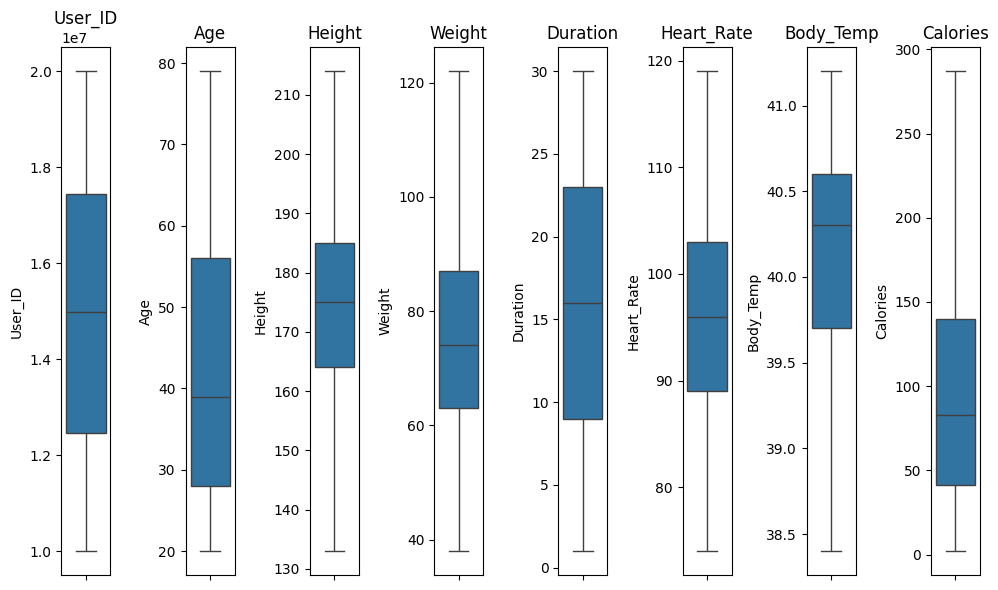

In [ ]:
#import matplotlib.pyplot as plt
df_copy=df.copy()
numerical_columns=df_copy.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10,6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[column])
    plt.title(f'{column}')
plt.tight_layout()

In [ ]:
numerical_columns

Index(['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
df_copy=df.copy()
df_copy.drop(['User_ID'],axis=1,inplace=True)
df_copy.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
numerical_df=df_copy.select_dtypes(include=[np.number])
numerical_df

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...
14994,48,159.0,57.0,10.0,94.0,39.8,52.0
14995,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,43,159.0,58.0,16.0,90.0,40.1,75.0


<Axes: >

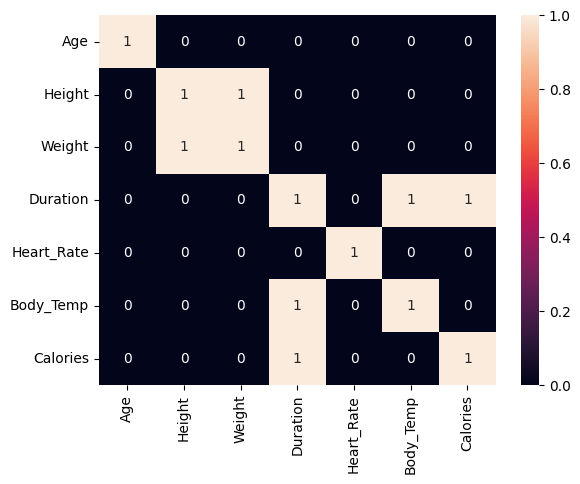

In [ ]:
#Correlation analysis
sns.heatmap(numerical_df.corr()>0.9, annot=True)

Height and weight are highly correlated and body temperature and duration are highly correlated.
Removing Height and Body_Temp

In [ ]:
df_copy.drop(['Height','Body_Temp'],axis=1,inplace=True)

In [ ]:
df_copy.head()

,Gender,Age,Weight,Duration,Heart_Rate,Calories
0,male,68,94.0,29.0,105.0,231.0
1,female,20,60.0,14.0,94.0,66.0
2,male,69,79.0,5.0,88.0,26.0
3,female,34,71.0,13.0,100.0,71.0
4,female,27,58.0,10.0,81.0,35.0


In [ ]:
df_copy.Calories.isnull().sum()

0

In [ ]:
df_copy.columns

Index(['Gender', 'Age', 'Weight', 'Duration', 'Heart_Rate', 'Calories'], dtype='object')

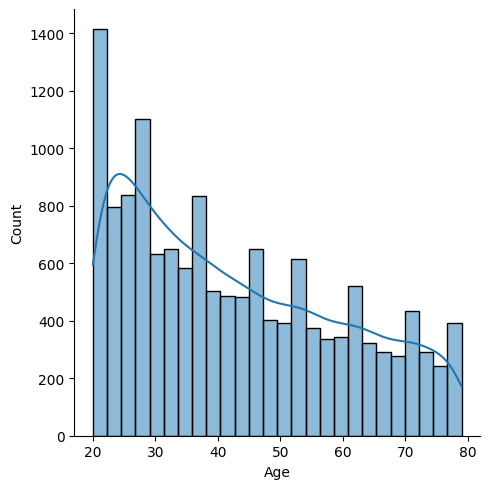

In [ ]:
sns.displot(df.Age, kde=True)

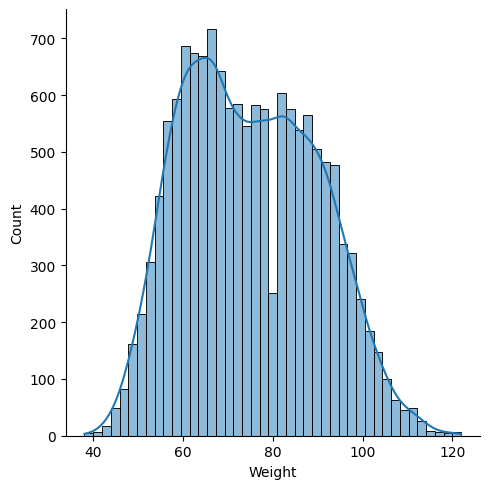

In [ ]:
sns.displot(df.Weight,kde=True)

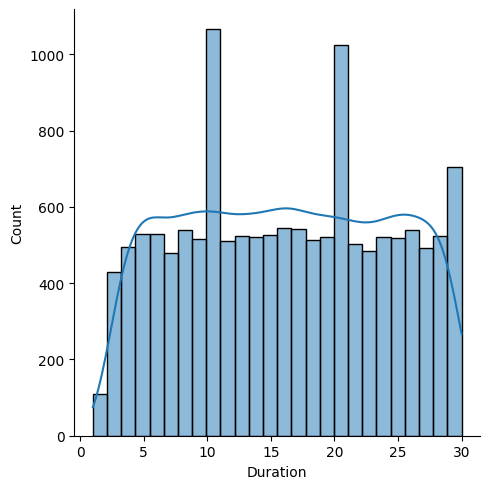

In [ ]:
sns.displot(df_copy.Duration,kde=True)

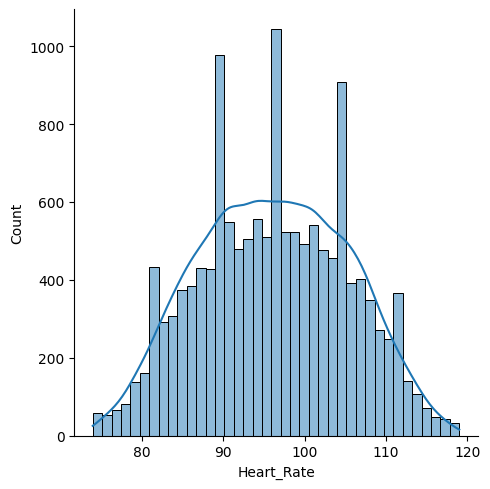

In [ ]:
sns.displot(df_copy.Heart_Rate,kde=True)

In [ ]:
#LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
label_encoder=LabelEncoder()

In [ ]:
gender=label_encoder.fit_transform(df_copy.Gender)
df_copy['Gender_label_encoded']=gender
df_copy.head()

,Gender,Age,Weight,Duration,Heart_Rate,Calories,Gender_label_encoded
0,male,68,94.0,29.0,105.0,231.0,1
1,female,20,60.0,14.0,94.0,66.0,0
2,male,69,79.0,5.0,88.0,26.0,1
3,female,34,71.0,13.0,100.0,71.0,0
4,female,27,58.0,10.0,81.0,35.0,0


In [ ]:
df_copy['Gender_label_encoded'].value_counts()

Gender_label_encoded
0    7147
1    7059
Name: count, dtype: int64

In [ ]:
df_copy['Gender'].value_counts()

Gender
female    7147
male      7059
Name: count, dtype: int64

In [ ]:
# 0 - female
# 1 - male

In [ ]:
df_copy.drop(columns=['Gender'],axis=1,inplace=True)

In [ ]:
#Splitting features and target column
X=df_copy.iloc[:,:-1].values
y=df_copy.iloc[:,-1].values

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
print(X_train)

[[ 31.  87.   3.  89.  11.]
 [ 62.  73.  16.  93.  83.]
 [ 37.  62.  25. 101. 143.]
 ...
 [ 70.  81.  12.  85.  52.]
 [ 35.  49.  18. 103. 109.]
 [ 31.  92.  18.  89.  67.]]


In [ ]:
print(X_test)

[[ 22.  62.   6.  85.  22.]
 [ 29.  66.   8.  93.  37.]
 [ 37.  96.  11.  94.  53.]
 ...
 [ 59.  90.  27. 100. 181.]
 [ 35.  50.  11.  89.  50.]
 [ 27.  92.  21.  97. 100.]]


In [ ]:
print(y_train)

[1 0 0 ... 0 0 1]


In [ ]:
print(y_test)

[0 0 1 ... 1 0 1]


In [ ]:
X.shape,X_train.shape,X_test.shape

((14206, 5), (11364, 5), (2842, 5))

In [ ]:
y.shape,y_train.shape,y_test.shape

((14206,), (11364,), (2842,))

In [ ]:
#Min max scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#Model-building, comparison and evaluation

In [ ]:
models=[LinearRegression, Ridge, Lasso, SVR, DecisionTreeRegressor, RandomForestRegressor]
mae_scores=[]
mse_scores=[]
rmse_scores=[]
r2_scores=[]

for model in models:
  regression_model=model().fit(X_train,y_train)
  y_pred=regression_model.predict(X_test)
  mae_scores.append(mean_absolute_error(y_test,y_pred))
  mse_scores.append(mean_squared_error(y_test,y_pred))
  rmse_scores.append(mean_squared_error(y_test,y_pred,squared=False))
  r2_scores.append(r2_score(y_test,y_pred))

In [ ]:
performance_metrics_df=pd.DataFrame({
    "Regression Model":["Linear Regression","Lasso","Ridge","SVR","Decision Tree Regression","Random Forest Regressor"],
    "Mean Absolute Error": mae_scores,
    "Mean Squared Error": mse_scores,
    "Root Mean Squared Error":rmse_scores,
    "R-squared (R2)":r2_scores
})

performance_metrics_df.set_index("Regression Model",inplace=True)
performance_metrics_df

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R-squared (R2)
Regression Model,,,,
Linear Regression,0.244010,0.089866,0.299776,0.640503
Lasso,0.244014,0.089866,0.299777,0.640500
Ridge,0.499974,0.249981,0.499981,-0.000021
SVR,0.114765,0.036610,0.191336,0.853548
Decision Tree Regression,0.109078,0.109078,0.330270,0.563645
Random Forest Regressor,0.120918,0.058123,0.241088,0.767484


The SVR outperforms the other models due to low error values compared to the other algorithms and high R-squared values